In [1]:
import random, numpy as np
!pip install scikit-learn

In [1]:
class kMeans:
    def __init__(self, k, numberOfIterations):
        """Initialize our algoritm, setting up number of clusters we want to create, and the number of iterations"""
        self.k = k
        self.numberOfIterations = numberOfIterations

    def calculateDistances(self, p1, p2):
        """Calculating distance between two points using euclidean distance"""
        x1, y1 = p1
        x2, y2 = p2
        return ( (x1-x2)**2 + (y1-y2)**2)**0.5

    def getKRandom(self, data):
        """Returns k random points from our data ( they are different )"""
        return random.sample(list(data), self.k)

    def fitting(self, X):
        """Our algorithm itself, it initializes 3 lists: centres are randomly picked points, clusters is an array where we add our points, labels is an array where we identify for each point to which center(cluster) does it belong to"""
        self.centres = self.getKRandom(X)
        self.clusters = [[] for _ in range(self.k)]
        self.labels = [None] * len(X)  # Initialize labels with None, ensuring the size matches X

        #We iterate through the number of iterations to minimize our Loss
        for i in range(self.numberOfIterations):
            # Reset clusters at the start of each iteration
            self.clusters = [[] for _ in range(self.k)]

            # Iterating through every point
            for idx, point in enumerate(X):
                distances = []
                for j in range(self.k):
                    #We calculate for each point, distance to each centre and then we add it to the array
                    dist = self.calculateDistances(self.centres[j], point)
                    distances.append([dist, j])

                #After we have calculated all the distances, we want to 'take' the shortest one
                distances.sort()
                closestCentroid = distances[0][1]
                
                self.labels[idx] = closestCentroid  # Update the label for this point
                self.clusters[closestCentroid].append(point)

            # Changing centroids (minimizing loss)
            for i in range(len(self.clusters)):
                ourPoints = self.clusters[i]
                if ourPoints:
                    new_centre = np.mean(ourPoints, axis=0)
                    self.centres[i] = new_centre

            
        

In [10]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
X, y_true = make_blobs(n_samples = 5000, centers = 3, random_state=78)
X = StandardScaler().fit_transform(X)

In [4]:
import matplotlib.pyplot as plt

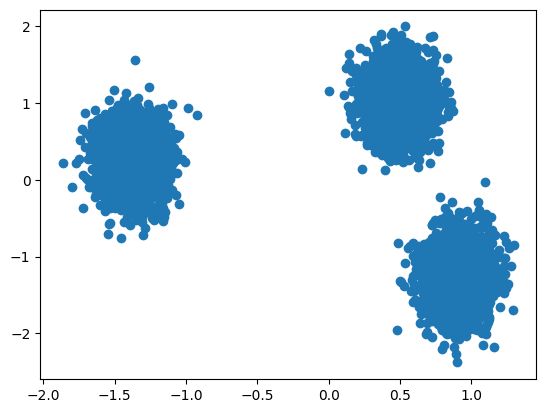

In [11]:
plt.scatter([i[0] for i in X], [i[1] for i in X])
plt.show()

In [12]:
KMeans = kMeans(k=3,numberOfIterations=20)
KMeans.fitting(X)

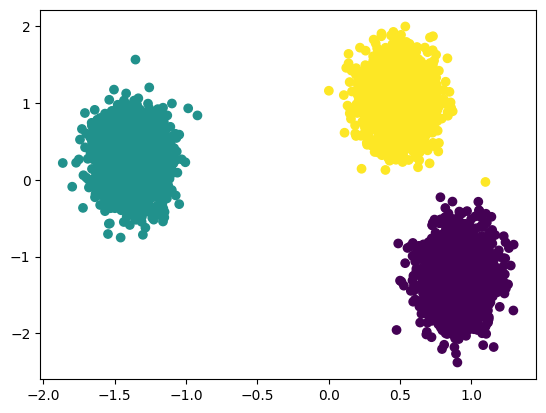

In [13]:
plt.scatter([i[0] for i in X], [i[1] for i in X], c = KMeans.labels)
plt.show()